# Note!

This notebook does minor processing on the rings_scores file, which is produced by the 
task ``invoke build`` . That task must be run first, and it can take a while.


In [1]:
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')
mp.jupyter.init()


In [2]:
#pkg = mp.jupyter.open_package()
pkg = mp.jupyter.open_source_package()
pkg

# Demosearch Score Sample
`civicknowledge.com-scores-demosearch-1.1.4` Last Update: 2021-06-11T17:01:29

_A sample of scores for businesses across the US for the Demosearch application._




 

## Contacts

* **Wrangler** [Eric Busboom](mailto:eric@civicknowledge.com), [Civic Knowledge](http://civicknowledge.com)

## Resources

* ** [scores](notebooks/build.ipynb#scores)**. Sampled scores.

## References
<ul><li> <strong>scorepoints</string>, <em>metapack+http://radius.civicknowledge.com.s3.amazonaws.com/civicknowledge.com-scorepoints-demosearch.csv#business_points</em>. 500K Business points</li><li> <strong>rings_scores</string>, <em>data/rings_scores.csv</em>. Sample scores, weighted sum and rings</li><ul>

In [3]:
df_rs = pkg.reference('rings_scores').dataframe()

In [4]:

n = list(df_rs.columns).index('ring_1')
rings = df_rs.iloc[:, n:]
scores = df_rs[['idx','geoid','geometry','layer']].copy()


In [5]:
from demosearch.kernel import ragged_breaks
kernel_df = ragged_breaks()
kernel_df.head()

,lower,upper,width,area,mean_r,a_frac,w_r_inv,w_r2_inv,w_r3_inv,w_circle4,w_lin_200,w_lin_800,w_lin_2000,w_half,w_zero,b_walk,b_drive,b_m135
ring,,,,,,,,,,,,,,,,,,
1,0,200,200,1.256637e+05,141.421356,0.000400,1.000000,1.000000,1.000000,1,0.296411,1.000000,0.929325,0.992929,0.985858,0,0,0
2,200,400,200,3.769911e+05,316.227766,0.001200,0.447214,0.200000,0.089443,1,0.000000,0.734973,0.841965,0.984189,0.968377,1,0,0
3,400,800,400,1.507964e+06,632.455532,0.004800,0.223607,0.050000,0.011180,1,0.000000,0.255534,0.683930,0.968377,0.936754,2,0,0
4,800,1260,460,2.976973e+06,1055.367235,0.009476,0.134002,0.017957,0.002406,1,0.000000,0.000000,0.472580,0.947232,0.894463,3,1,0
5,1260,1600,340,3.054885e+06,1440.069443,0.009724,0.098205,0.009644,0.000947,0,0.000000,0.000000,0.280325,0.927997,0.855993,-1,1,0


In [6]:
for weight_name in [c for c in kernel_df.columns if c.startswith('w_')]:

    k = kernel_df[weight_name].T
    scores[weight_name] = np.sum(rings.values * k.values, axis=1)
    

In [12]:
scores.idx.value_counts().sort_values()

18047      12
68727      12
41954      12
38607      12
12425      12
           ..
1857494    24
908232     24
1871292    24
1957275    24
2143738    24
Name: idx, Length: 497264, dtype: int64

<AxesSubplot:>

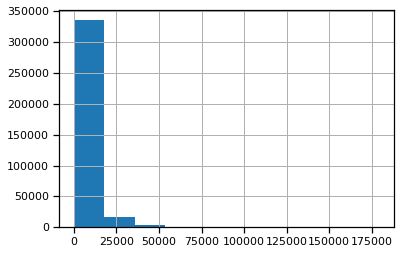

In [8]:
scores[scores.layer == 'tracts/pop/total_population'].w_circle4.hist()

In [15]:
scores[scores.idx == 1857494].layer.unique()

array(['osmpoints/active', 'osmpoints/amenity', 'osmpoints/bar',
       'osmpoints/cafe', 'osmpoints/casual', 'osmpoints/entertain',
       'osmpoints/food', 'osmpoints/playpark', 'osmpoints/restaurant',
       'osmpoints/travel', 'roads/tertiary', 'tracts/hh/households',
       'tracts/hh/households_cohabiting', 'tracts/hh/households_unmaried',
       'tracts/hh/housing_occupied', 'tracts/hh/housing_owned',
       'tracts/hh/housing_rented_college', 'tracts/pop/agg_income',
       'tracts/pop/commute_25gte', 'tracts/pop/commute_25lt',
       'tracts/pop/manufacturing_ocupations',
       'tracts/pop/population_18lt', 'tracts/pop/seniors',
       'tracts/pop/total_population'], dtype=object)

In [16]:
scores[scores.idx == 18047].layer.unique()

array(['osmpoints/amenity', 'osmpoints/casual', 'osmpoints/food',
       'osmpoints/playpark', 'osmpoints/shop', 'roads/primary',
       'tracts/hh/housing_occupied', 'tracts/hh/housing_owned',
       'tracts/pop/commute_25gte', 'tracts/pop/commute_25lt',
       'tracts/pop/manufacturing_ocupations',
       'tracts/pop/total_population'], dtype=object)